In [34]:
### generate data
import numpy as np
np.random.seed(5)

def generate_data(n_samples, true_coefficients, noise_level=0.1):

    # Generate a random input signal
    k = len(true_coefficients)
    m, n = true_coefficients[0].shape

    x = np.random.randn(n_samples, m)

    # Generate the desired signal by passing the input through the known system
    y = np.zeros((n_samples, n)) 

    for j in range(k):
        ### with a shift of j
        y += np.dot(np.roll(x, j, axis=0), true_coefficients[j])
    y += noise_level * np.random.randn(n_samples, n)
    
    return x, y

# Example usage
n_samples = 300
# a series of matrix: k x m x n 
# k : influence scope 5
# m : output dimension  3
# n : input dimension 2

k = 3
m = 3
n = 2
true_coefficients = [np.random.randn(m,n) for _ in range(k)]
noise_level = 0.1
x, y = generate_data(n_samples, true_coefficients, noise_level)
print("Input signal:", x[:3])
print("Desired signal:", y[:3])

Input signal: [[-1.51117956  0.64484751 -0.98060789]
 [-0.85685315 -0.87187918 -0.42250793]
 [ 0.99643983  0.71242127  0.05914424]]
Desired signal: [[ 2.40235487 -1.57403713]
 [-1.88020938  0.56571107]
 [ 1.71170999 -2.76116049]]


In [35]:
### LMS filter
k = len(true_coefficients)
def lms_filter(x, y, k, mu ):
    Ws = [] 
    m, n = x.shape[1], y.shape[1]
    w = np.array([np.random.randn(m, n) for _ in range(k)])  # k x m x n
    e = np.zeros((n_samples, n))
    for i in range(k, len(x)):
        y_hat = np.zeros((n,))
        for j in range(k):
            y_hat += np.dot(x[i-j], w[j])
        error = y[i] - y_hat 
        e[i] = error
        for j in range(k):
            w[j] += mu *  np.outer(x[i-j], error)
        Ws.append(w.reshape(k, m, n).copy())
    return w,e, Ws


In [36]:
w,e, Ws = lms_filter(x, y, k, 0.1)
print("Estimated coefficients:", w[1])
print ("True coefficients:", true_coefficients[1])

Estimated coefficients: [[-0.87576509 -0.56023514]
 [ 0.17453574 -0.30774221]
 [-1.19770753 -0.19762947]]
True coefficients: [[-0.9092324  -0.59163666]
 [ 0.18760323 -0.32986996]
 [-1.19276461 -0.20487651]]


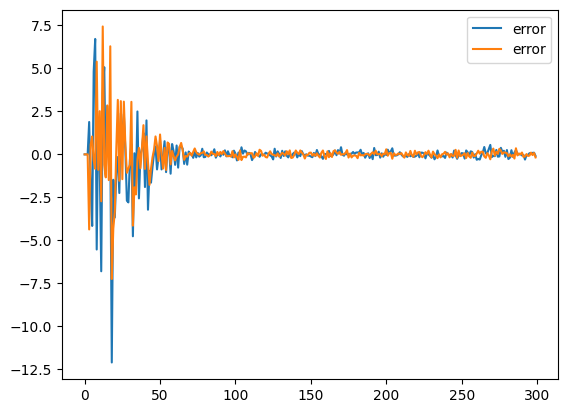

In [37]:
### plot the error
import matplotlib.pyplot as plt
plt.figure()
plt.plot(e, label='error')
plt.legend()
plt.show()


In [31]:
### save Ws to file
import pickle
with open('NoMemLMSWs.pkl', 'wb') as f:
    pickle.dump(Ws, f)


In [32]:
Ws[0]

array([[[-1.25729355, -0.28950277],
        [-0.04738197, -1.42189777],
        [ 0.5579959 , -0.36338857]],

       [[ 0.94035915, -1.28949236],
        [-2.7842538 ,  0.2602722 ],
        [ 0.40192466,  2.15999247]],

       [[-0.14389968,  0.4989337 ],
        [ 1.4957565 , -2.55876853],
        [-1.59792955, -1.88979011]]])

In [33]:
Ws[100]

array([[[-0.84819596, -0.2271125 ],
        [ 0.95791659, -1.25095346],
        [ 0.11726829,  3.16363824]],

       [[-0.02824719, -0.0179444 ],
        [ 0.06546126, -0.00819561],
        [-0.00320843, -0.04376222]],

       [[ 0.04744124, -0.05388643],
        [-0.01984297, -0.02762918],
        [-0.06263714, -0.03470233]]])